 Знакомимся с новыми данными:

In [18]:
import pandas as pd
covid_data = pd.read_csv('D:/python/GUESS/РАБОЧАЯ/PANDAS/визуализация/DATA/covid_data.csv')
# display(covid_data.head())

# Обратите внимание, что в приведённом источнике данные о вакцинации постоянно обновляются. В данном модуле будет использоваться файл, который мы скачали заранее.
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]


ПРЕДОБРАБОТКА ДАННЫХ

Опираясь на замечания выше, выполним небольшую предобработку.

В таблице covid_data:

1
Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
2
Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

covid_data['date'] = pd.to_datetime(covid_data['date'])
3
Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
4
Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
Итоговый вид таблицы covid_data:

Img

В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [19]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

display(covid_data['date'].max(), covid_data['date'].min())
display(vaccinations_data['date'].min(), vaccinations_data['date'].max())
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df.shape


Timestamp('2021-05-29 00:00:00')

Timestamp('2020-01-22 00:00:00')

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

(86785, 16)

В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [20]:
covid_df.head()
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100

#display(round((covid_df[covid_df['country'] == 'United States'].sort_values(by= 'death_rate', ascending=False)['death_rate']),2))


round((covid_df[covid_df['country'] == 'Russia'].loc[:,'recover_rate'].mean()), 2)

67.06

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

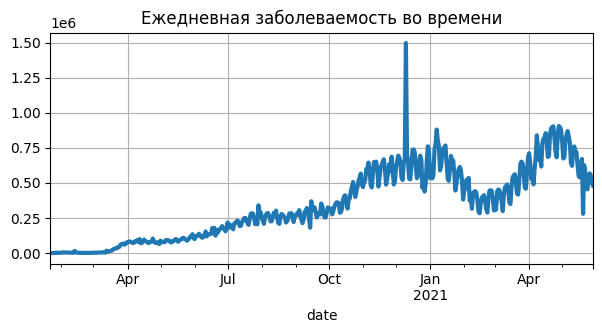

In [4]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(7, 3),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

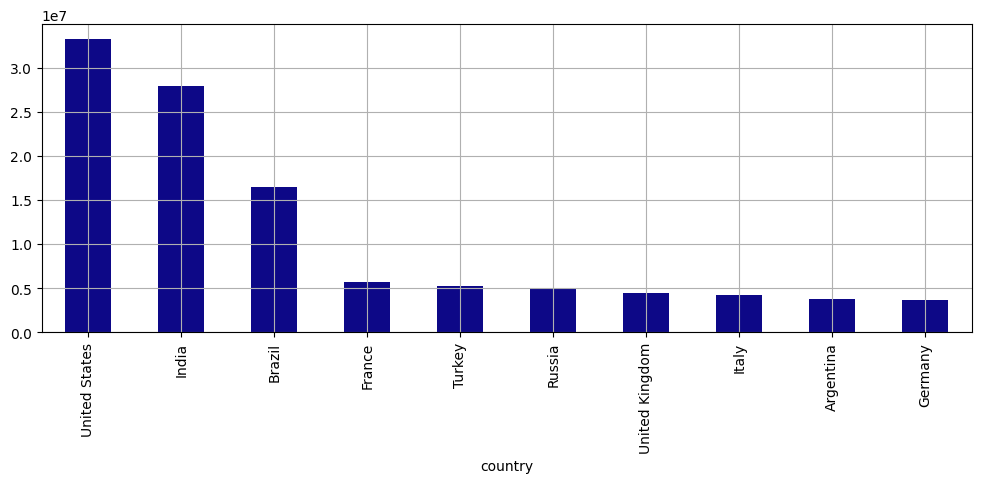

In [73]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

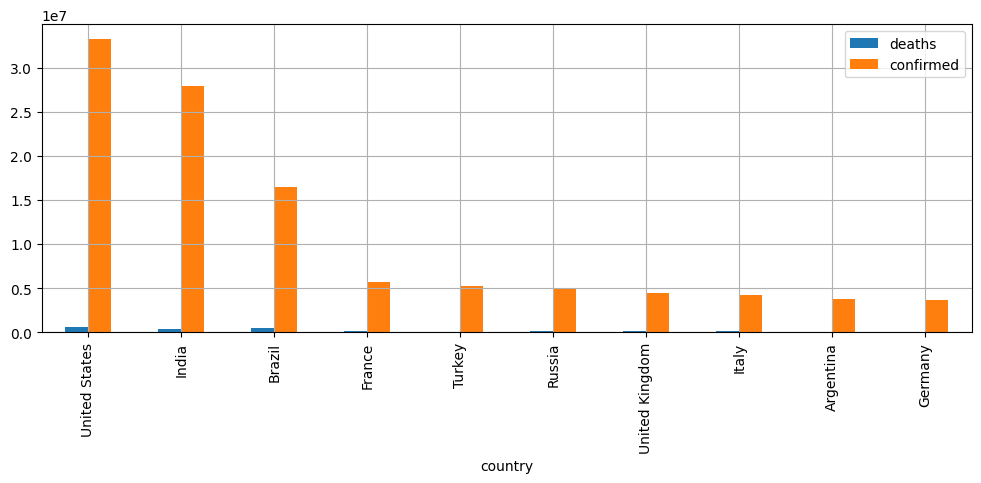

In [5]:
grouped_country = covid_df.groupby(['country'])[['deaths','confirmed']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(kind='bar',grid=True,figsize=(12, 4), );

Задание 4.4
1/1 point (graded)
С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?
В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить последнее непустое значение в группах.
   Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?


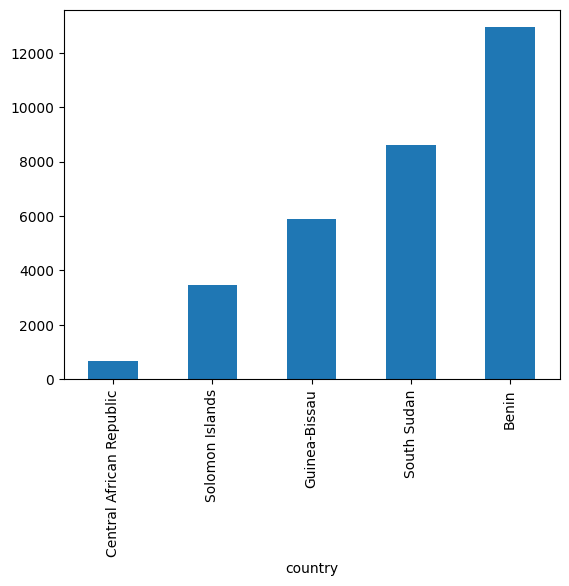

In [6]:
import pandas as pd
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

Графические возможности библиотеки Matplotlib

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

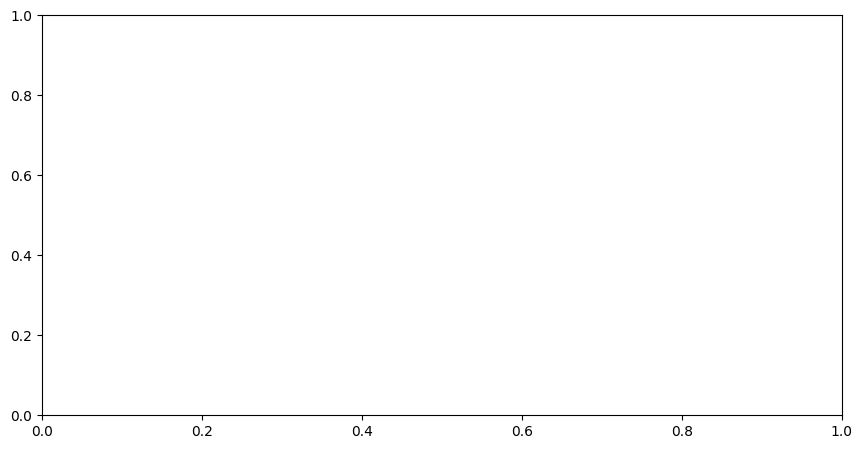

In [12]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

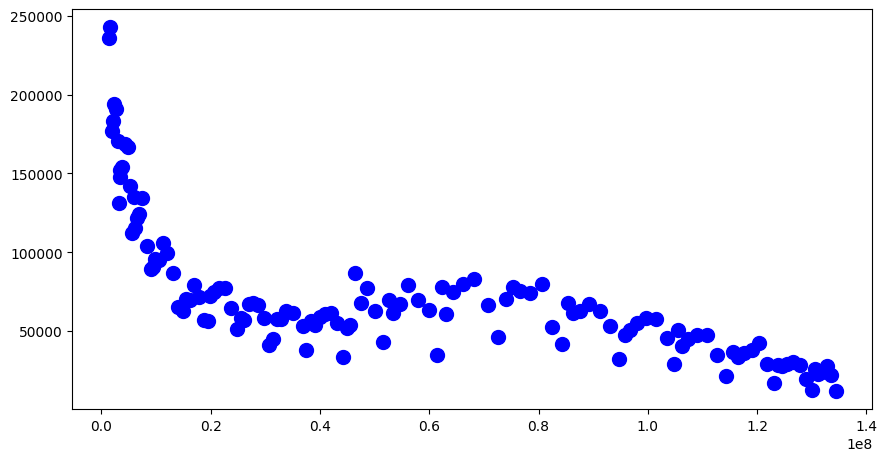

In [41]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

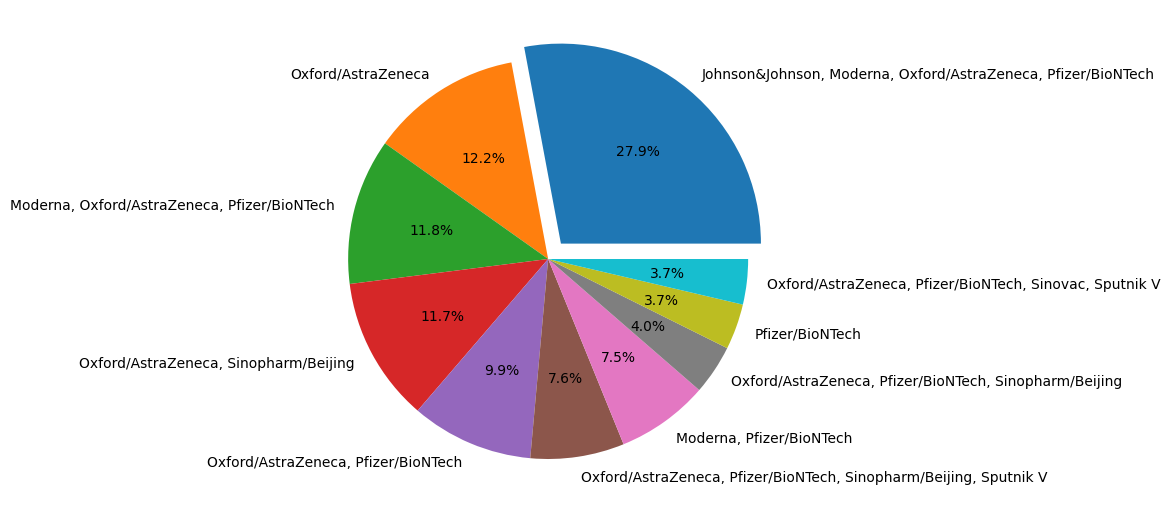

In [42]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

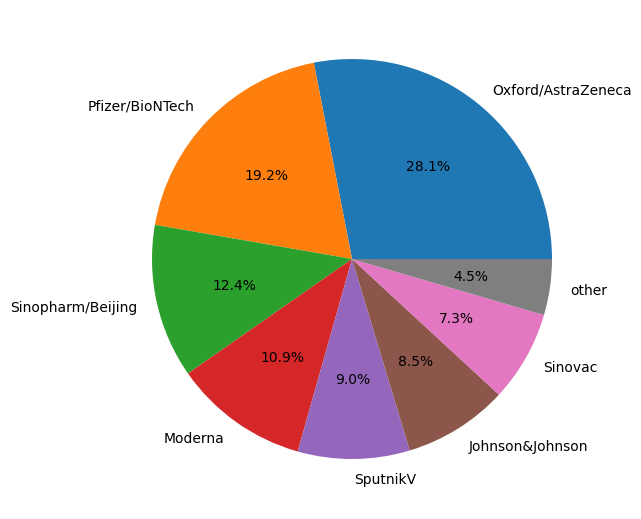

In [43]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

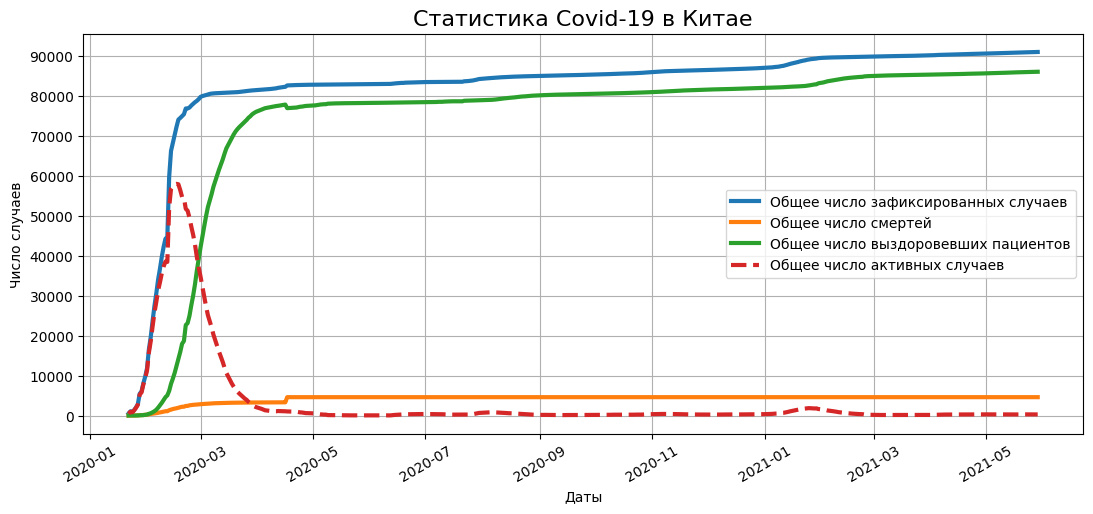

In [53]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

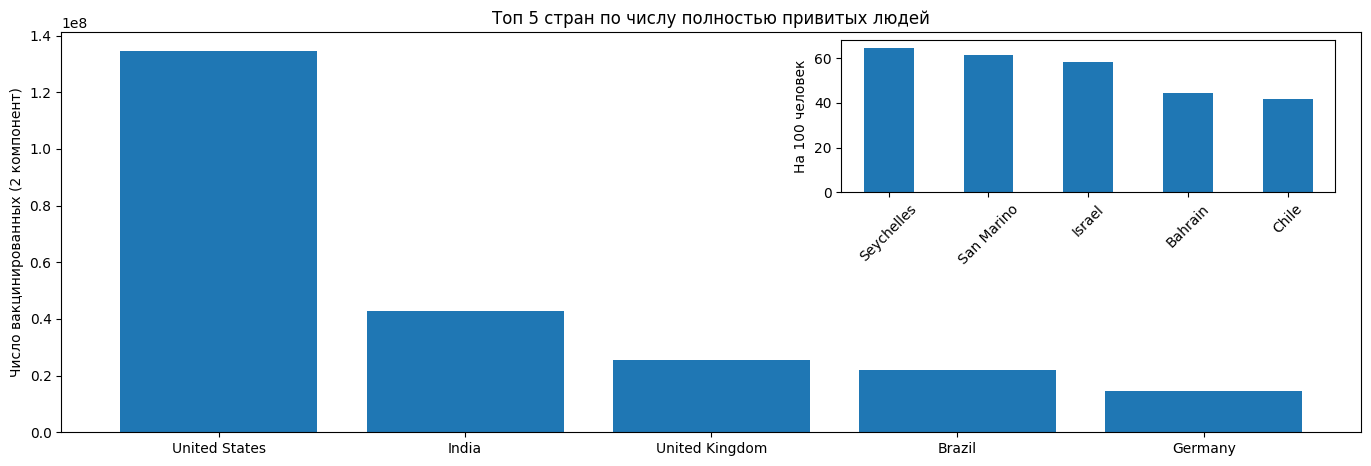

In [23]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

covid_df.to_csv('D:/python/GUESS/РАБОЧАЯ/PANDAS/визуализация/DATA/covid_df.csv')
#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

SUBPLOTS

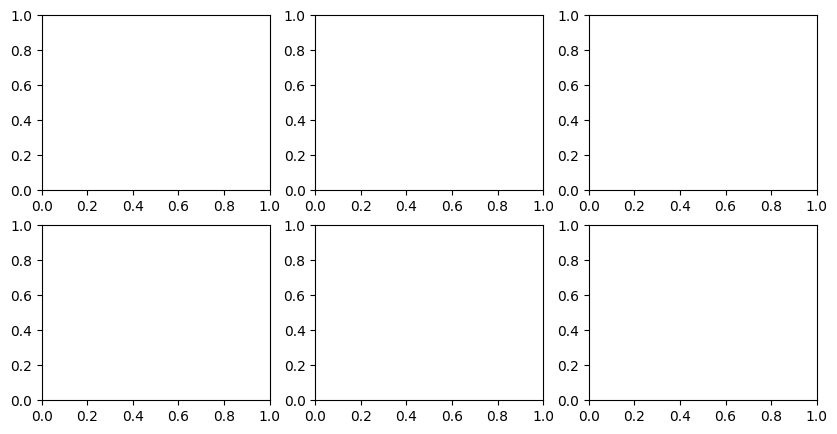

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

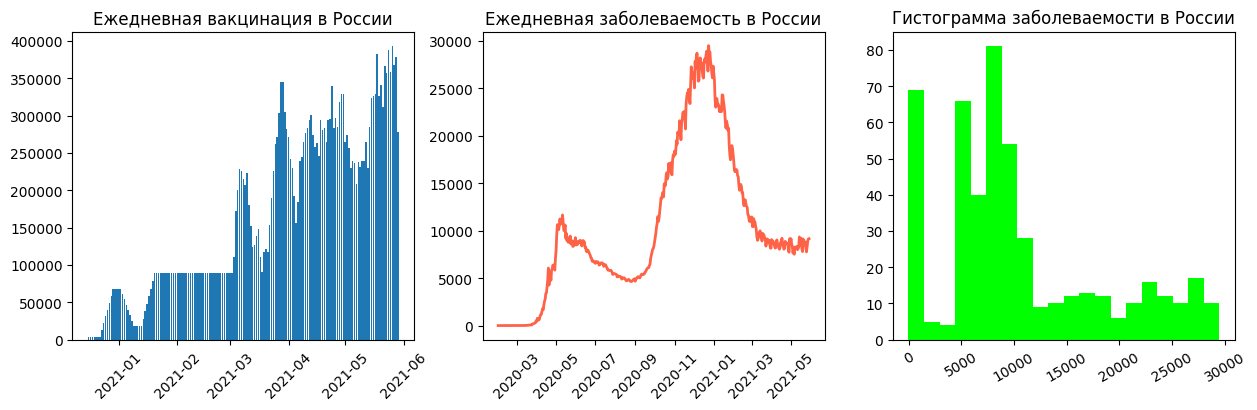

In [37]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

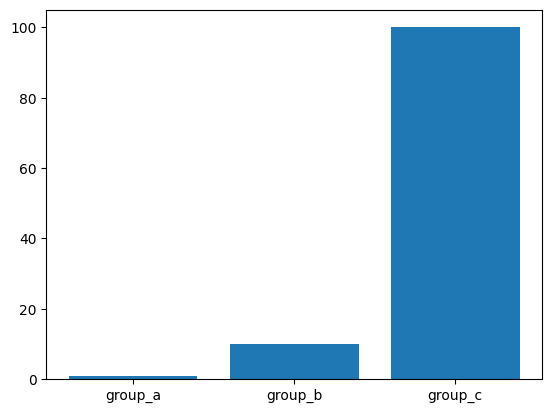

In [38]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

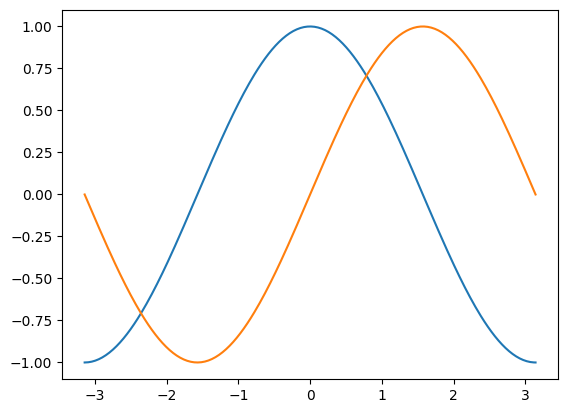

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
X = np.linspace(-np.pi, np.pi, 256, endpoint=True) 
cos, sin = np.cos(X), np.sin(X) 
plt.plot(X, cos) 
plt.plot(X, sin) 
plt.show()


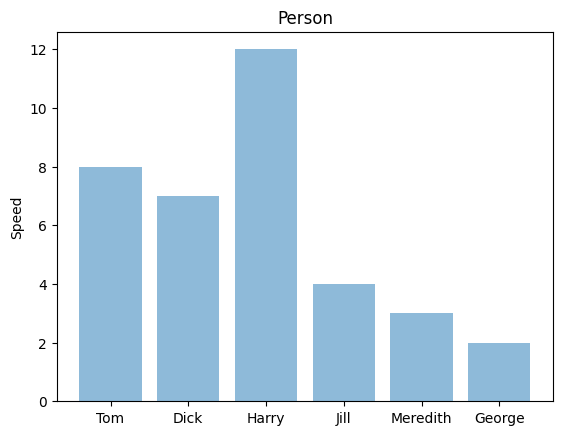

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np 
import matplotlib.pyplot as plt 
names = ('Tom', 'Dick', 'Harry', 'Jill', 'Meredith', 'George') 
y_pos = np.arange(len(names)) 
speed = [8, 7, 12, 4, 3, 2] 
plt.bar(y_pos, speed, align='center', alpha=0.5) 
plt.xticks(y_pos, names) 
plt.ylabel('Speed') 
plt.title('Person') 
plt.show()


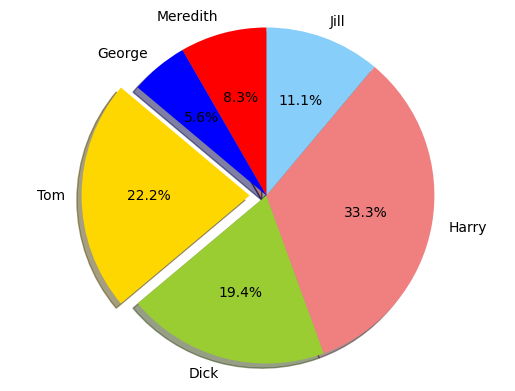

In [14]:
import matplotlib.pyplot as plt
# Data to plot 
names = 'Tom', 'Dick', 'Harry', 'Jill', 'Meredith', 'George' 
speed = [8, 7, 12, 4, 3, 2] 
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'blue'] 
explode = (0.1, 0, 0, 0, 0, 0)
# explode 1st slice # 
# Plot
plt.pie(speed, explode=explode, labels=names, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis('equal')
plt.show()


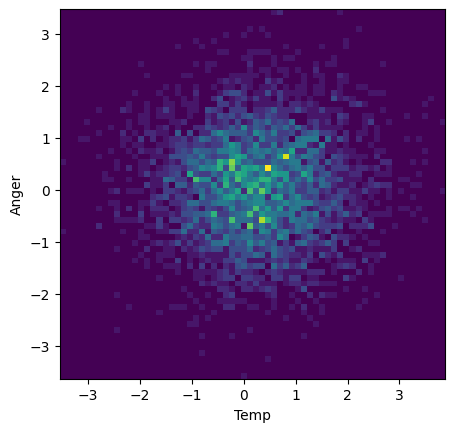

In [15]:
import numpy as np 
import numpy.random 
import matplotlib.pyplot as plt 
# Create data 
temperature = np.random.randn(4096) 
anger = np.random.randn(4096) 
# Create heatmap 
heatmap, xedges, yedges = np.histogram2d(temperature, anger, bins=(64,64)) 
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# Plot heatmap 
plt.clf() 
plt.ylabel('Anger') 
plt.xlabel('Temp')
plt.imshow(heatmap, extent=extent)
plt.show()
